In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/souvik/anaconda3/envs/tflowenv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 71s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

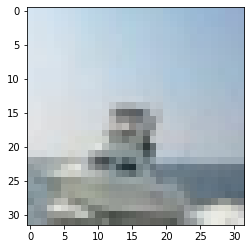

In [6]:
plt.imshow(x_train[100])

In [8]:
x_train=x_train/255

In [9]:
x_test=x_test/255

In [10]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train, 10)

In [15]:
y_cat_test = to_categorical(y_test, 10)

In [16]:
y_train[0]

array([6], dtype=uint8)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),
                input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),
                input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
                metrics=['accuracy'])

2022-08-12 18:35:20.599614: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-08-12 18:35:20.632520: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2419200000 Hz
2022-08-12 18:35:20.633474: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55be76505400 executing computations on platform Host. Devices:
2022-08-12 18:35:20.633524: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [20]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test),
        callbacks=[early_stop])

2022-08-12 18:36:12.905744: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 1228800000 exceeds 10% of system memory.
2022-08-12 18:36:17.781719: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 245760000 exceeds 10% of system memory.


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 47s 934us/sample - loss: 1.4900 - accuracy: 0.4634 - val_loss: 1.2511 - val_accuracy: 0.5490
Epoch 2/15
50000/50000 [==============================] - 38s 766us/sample - loss: 1.1857 - accuracy: 0.5837 - val_loss: 1.1488 - val_accuracy: 0.5959
Epoch 3/15
50000/50000 [==============================] - 37s 749us/sample - loss: 1.0417 - accuracy: 0.6351 - val_loss: 1.0548 - val_accuracy: 0.6315
Epoch 4/15
50000/50000 [==============================] - 37s 741us/sample - loss: 0.9372 - accuracy: 0.6737 - val_loss: 0.9870 - val_accuracy: 0.6541
Epoch 5/15
50000/50000 [==============================] - 37s 743us/sample - loss: 0.8520 - accuracy: 0.7047 - val_loss: 0.9623 - val_accuracy: 0.6672
Epoch 6/15
50000/50000 [==============================] - 37s 743us/sample - loss: 0.7722 - accuracy: 0.7333 - val_loss: 0.9509 - val_accuracy: 0.6752
Epoch 7/15
50000/50000 [====================

In [21]:
metrics = pd.DataFrame(model.history.history)

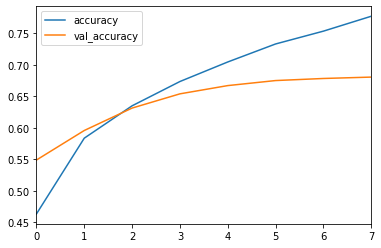

In [22]:
metrics[['accuracy', 'val_accuracy']].plot()

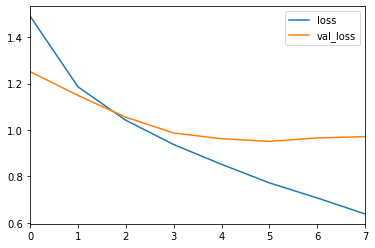

In [23]:
metrics[['loss', 'val_loss']].plot()

In [25]:
model.evaluate(x_test, y_cat_test)

2022-08-12 18:48:48.137895: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 245760000 exceeds 10% of system memory.


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.9713545870780945, 0.6807]

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict_classes(x_test)

/home/souvik/anaconda3/envs/tflowenv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/souvik/anaconda3/envs/tflowenv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
2022-08-12 18:49:28.125943: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 245760000 exceeds 10% of system memory.


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1000
           1       0.79      0.80      0.80      1000
           2       0.63      0.51      0.56      1000
           3       0.48      0.50      0.49      1000
           4       0.58      0.72      0.65      1000
           5       0.61      0.58      0.59      1000
           6       0.78      0.75      0.77      1000
           7       0.76      0.70      0.73      1000
           8       0.73      0.81      0.77      1000
           9       0.83      0.68      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



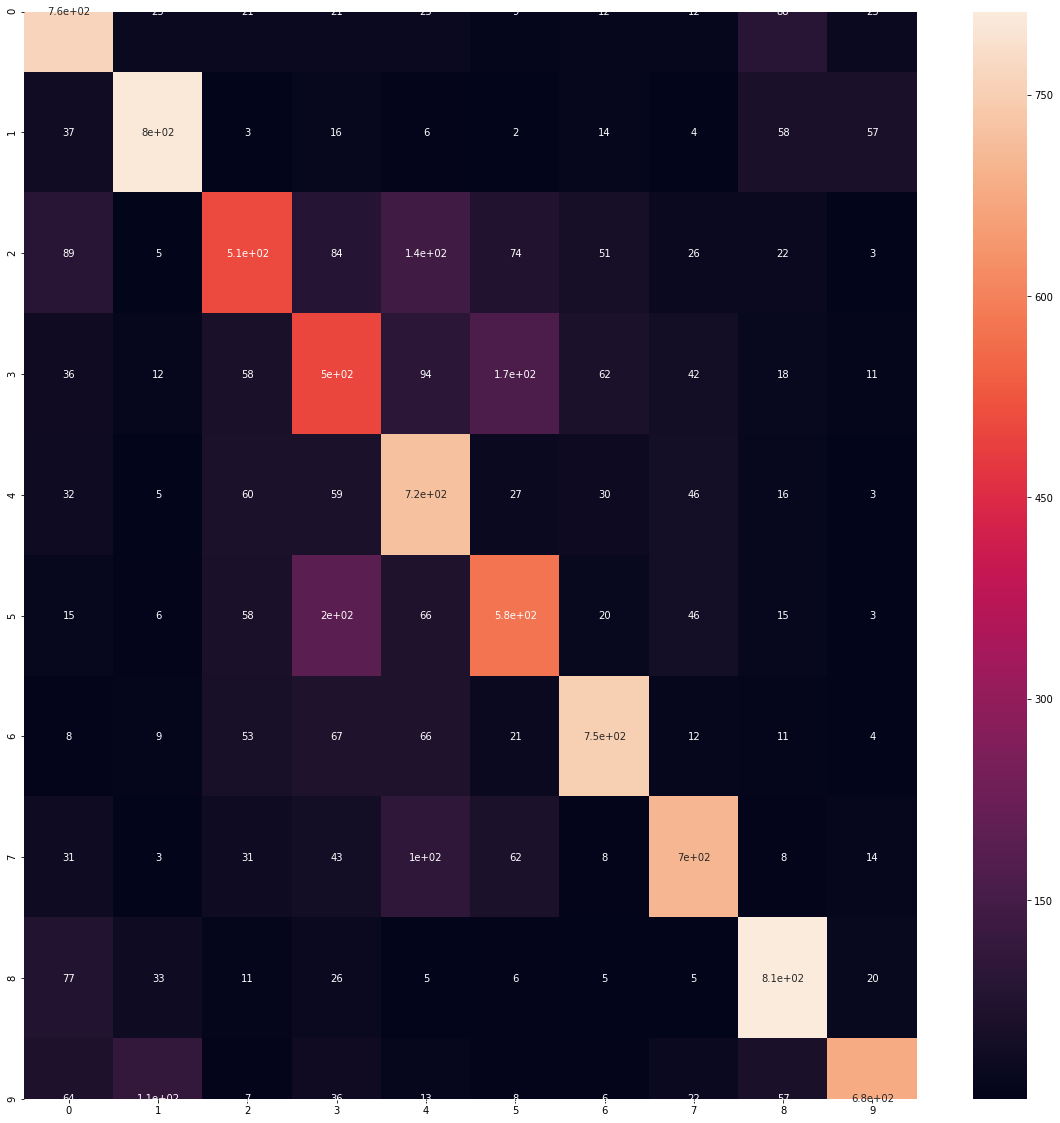

In [30]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [37]:
my_image = x_test[140]

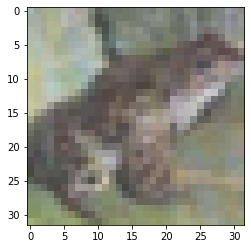

In [38]:
plt.imshow(my_image)

In [39]:
model.predict_classes(my_image.reshape(1, 32, 32, 3))

array([4])